In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pathToFile = r"./data/Dataset-01.xlsx"
keysToSearch = ["Effluent","Influent","Standard"]

allData = {k:None for k in keysToSearch}
for key in keysToSearch:
    allData[key] = pd.read_excel(pathToFile,sheet_name=key)

pathToFile = r"./data/Time.xlsx"
time = pd.read_excel(pathToFile,sheet_name="Time",index_col="Sample ID")

In [6]:
data = allData["Effluent"]

In [10]:
strConc = 'Calculated Concentration (ng/mL)'
groupSamples = data[["Sample Name",strConc]].groupby(by=["Sample Name"],as_index=True,sort=False)

In [13]:
statistics = pd.concat([time[["Cumulative Time (min)"]],
                        groupSamples.mean().rename(columns={strConc:"mean"}),
                        groupSamples.std().rename(columns={strConc:"std"}),
                        groupSamples.count().rename(columns={strConc:"nSamples"})], axis = 1)

In [16]:
statistics.tail(2)

,Cumulative Time (min),mean,std,nSamples
RSSCT-1-198,5019.358872,0.180100,0.081387,3
RSSCT-1-200,5068.265000,0.191333,0.037112,3


/home/edsaa/venv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/edsaa/venv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


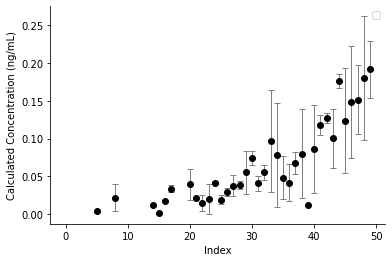

In [17]:
fig,ax = plt.subplots()
#ax.plot(averages["Effluent"][strConc],label='PFOA',lw=0,marker='.')
ax.errorbar(np.arange(len(statistics)),statistics["mean"],statistics["std"],
            lw=0,c='k',marker="o",ecolor='gray',elinewidth=1,capsize=3)
ax.set_xlabel("Index")
ax.set_ylabel(strConc)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()